In [1]:
# Dependencies
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/dionisos/dionisos_horizons/gempy_format/teste_1/"
#geo_model = gp.create_model("Dionisos-BES-Horizons-v1")

Setting Backend To: AvailableBackends.numpy


### Detalhes dos dados
- Contém os horizontes 1, 2 e 27 gerado do dionisos e convertido para .csv
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000)
- O Z dos horizontes 2 e 27 foram ajustados (-mil e - 2mil, respectivamente)
- Cada horizonte (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy

## Step by step

In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="Dionisos-BES-Horizons-v1_GP3",
    extent=[0, 175000, 0, 150000, -15000, 0],
    resolution=[50, 50, 50],
    importer_helper=gp.data.ImporterHelper(
        path_to_surface_points=data_path + "sp_Horizons_1_2_27_merged_test.csv",
        path_to_orientations=data_path + "orientations_points.csv",
    ),
)

In [3]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Horizon_1,
	color=#015482,
	is_active=True
),
Element(
	name=Horizon_2,
	color=#9f0052,
	is_active=True
),
Element(
	name=Horizon_27,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [5]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series_1": ("Horizon_1",),
        "Strat_Series_2": ("Horizon_2",),
        "Strat_Series_3": ("Horizon_27",),
    }
)

geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series_1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Horizon_1,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series_2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Horizon_2,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series_3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Horizon_27,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False],
 [False, False, False],
 [False, False, False]],

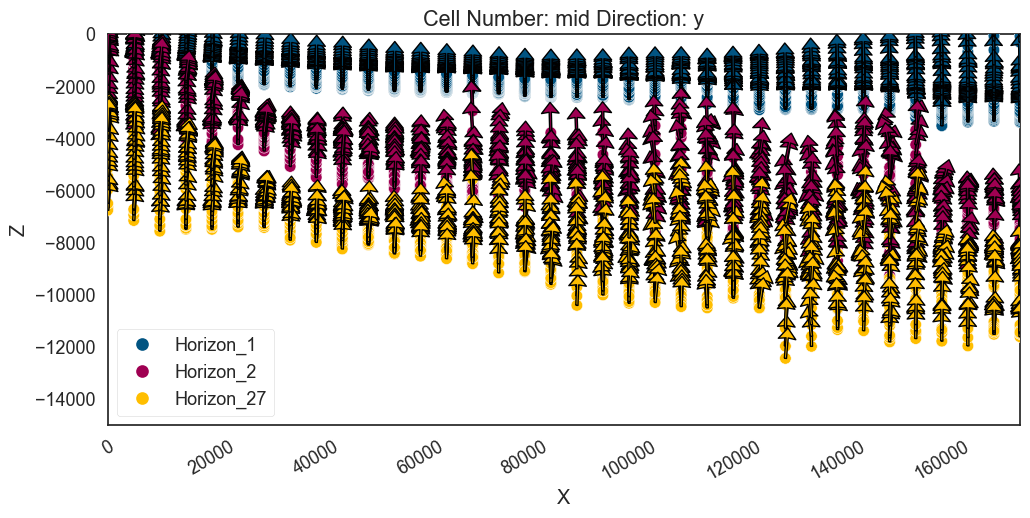

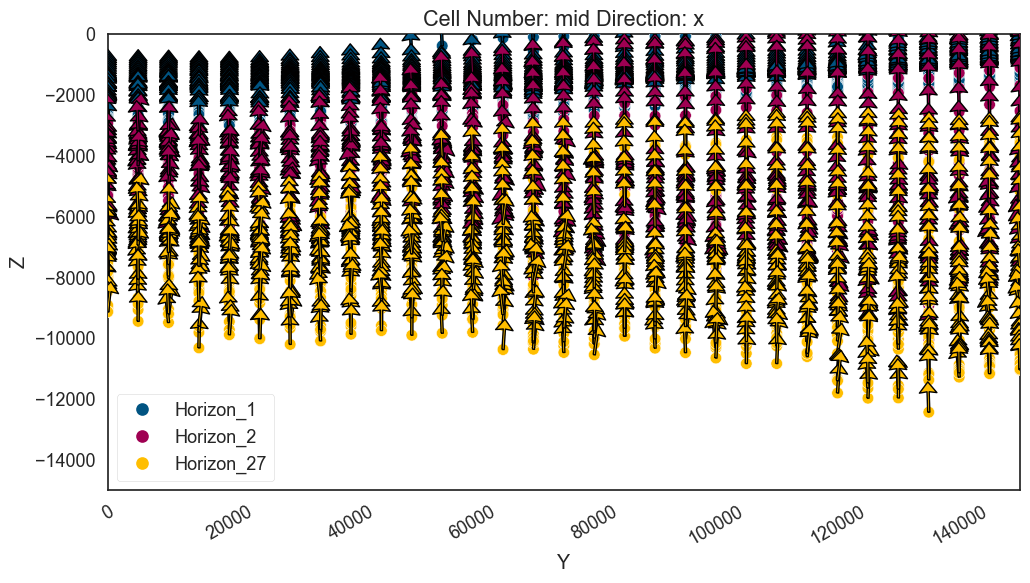

In [12]:
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=5, legend=True)

In [13]:
gempy_vista_premodel = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    active_scalar_field=None,
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_lith=True,
    show_scalar=True,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_premodel.p

# Customize the plot
plotter.show_grid()
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 


# Show the plot
plotter.show()

- NUMPY

In [ ]:
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        dtype="float64",
    ))

- PYTORCH

In [14]:
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        #dtype="float64", "float32"
    ))

Setting Backend To: AvailableBackends.PYTORCH
Condition number: 40288664.78774408.


In [ ]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

In [ ]:
#import pickle
#with open(save_path + "", "wb") as f:
#    pickle.dump(geo_model, f)